In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba2k20-player-dataset/nba2k-full.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


/tmp/ipykernel_32/2910602305.py:66: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='salary', ylabel='Density'>

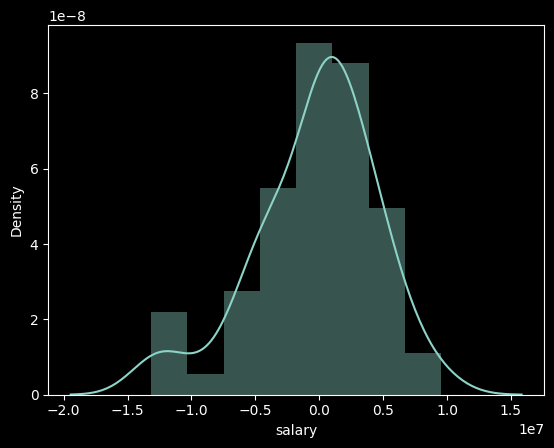

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
df = pd.read_csv('/kaggle/input/nba2k20-player-dataset/nba2k-full.csv')
df.head()
df.shape
df.info()
df = df.dropna()
df.isnull().sum().sum()
df = df.drop(['full_name', 'b_day', 'height', 'weight', 'college', 'version'], axis = 1)
df.head()
def removehash(value):
    value = value[1:]
    return int(value)

df['jersey'] = df['jersey'].apply(removehash)
df.head()
df['salary'] = df['salary'].apply(removehash)
df.head()
df['team'].value_counts()
df['country'].value_counts()
def removecountryoutlier(value):
    if value not in ['USA', 'Canada', 'Australia']:
        return 'Others'
    else:
        return value

df['country'] = df['country'].apply(removecountryoutlier)
df['country'].value_counts()
   
df['position'].value_counts()
df.head()
df['draft_round'].unique
df['draft_peak'].unique
def removeundrafted(value):
    if value=='Undrafted':
        return 
    else:
        return value
    
df['draft_round'] = df['draft_round'].apply(removeundrafted)
df['draft_peak'] = df['draft_peak'].apply(removeundrafted)

df = df.dropna()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['position'] = le.fit_transform(df['position'])
df['country'] = le.fit_transform(df['country'])
df['team'] = le.fit_transform(df['team'])

df.head()
x = df.drop(['salary'], axis = 1)
y = df['salary']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)


diff = y_test - predictions

import seaborn as sns
sns.distplot(diff)


In [13]:
import pickle
pickle.dump(lr, open('/kaggle/working/model.sav', 'wb'))